In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cluster_df = pd.read_csv('clustering-annotations.csv')

In [4]:
annot_columns = ['gemini_1.5_flash_annotation', 'gemini_2.0_flash_annotation', 'learnlm_1.5_flash_annotation']

In [5]:
cluster_annot = cluster_df[annot_columns]
cluster_annot

,gemini_1.5_flash_annotation,gemini_2.0_flash_annotation,learnlm_1.5_flash_annotation
0,Correct,Correct,Correct
1,Correct,Correct,Correct
2,Incorrect,Incorrect,Partially Correct
3,Partially Correct,Partially Correct,Partially Correct
4,Correct,Correct,Correct
...,...,...,...
95,Partially Correct,Partially Correct,Partially Correct
96,Incorrect,Incorrect,Correct
97,Incorrect,Partially Correct,Correct
98,Incorrect,Incorrect,Correct


In [6]:
for column in annot_columns:
    print(cluster_annot[column].value_counts())
    print(cluster_annot[column].value_counts()['Correct']+cluster_annot[column].value_counts()['Partially Correct'])
    print("\n")

gemini_1.5_flash_annotation
Correct              43
Incorrect            40
Partially Correct    17
Name: count, dtype: int64
60


gemini_2.0_flash_annotation
Correct              41
Incorrect            33
Partially Correct    25
Name: count, dtype: int64
66


learnlm_1.5_flash_annotation
Correct              59
Partially Correct    24
Incorrect            17
Name: count, dtype: int64
83




In [7]:
default_df = pd.read_csv('annotated-results.csv')

In [8]:
default_annot = default_df[annot_columns]
default_annot

,gemini_1.5_flash_annotation,gemini_2.0_flash_annotation,learnlm_1.5_flash_annotation
0,Correct,Correct,Correct
1,Partially Correct,Partially Correct,Partially Correct
2,Correct,Correct,Correct
3,Partially Correct,Partially Correct,Partially Correct
4,Correct,Correct,Incorrect
...,...,...,...
95,Incorrect,Partially Correct,Partially Correct
96,Incorrect,Incorrect,Correct
97,Incorrect,Partially Correct,Correct
98,Incorrect,Incorrect,Correct


In [9]:
for column in annot_columns:
    print(default_annot[column].value_counts())
    print(default_annot[column].value_counts()['Correct']+default_annot[column].value_counts()['Partially Correct'])
    print("\n")

gemini_1.5_flash_annotation
Correct              45
Incorrect            33
Partially Correct    22
Name: count, dtype: int64
67


gemini_2.0_flash_annotation
Correct              50
Partially Correct    25
Incorrect            25
Name: count, dtype: int64
75


learnlm_1.5_flash_annotation
Correct              60
Incorrect            21
Partially Correct    19
Name: count, dtype: int64
79




In [10]:
conversation_df = pd.read_csv('conversation.csv')
conversation_df.head()

,Question,Answer,Flesch_Reading_Ease,Dale_Chall_Readability_Score
0,"Where did you grow up, and what was it like th...","Right, listen up. I grew up with the Dursleys...",89.34,6.56
1,What’s something interesting or unique about y...,"""Godric's Hollow, you see? It's a bit of a sp...",87.52,8.90
2,Do you have any siblings? What’s your relation...,"Yeah, I've got a brother, and... well, it's co...",82.00,6.44
3,How did your parents meet?,"Right, well, I don't really *remember* it, see...",89.85,6.28
4,What was your favorite childhood memory?,"Right, about my favourite childhood memory... ...",81.09,6.19


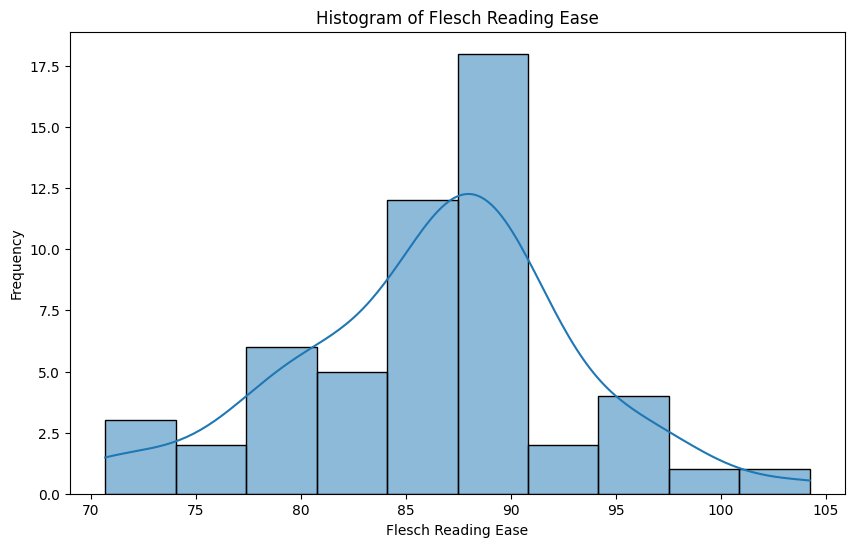

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(conversation_df['Flesch_Reading_Ease'], bins=10, kde=True)
plt.title('Histogram of Flesch Reading Ease')
plt.xlabel('Flesch Reading Ease')
plt.ylabel('Frequency')
plt.show()

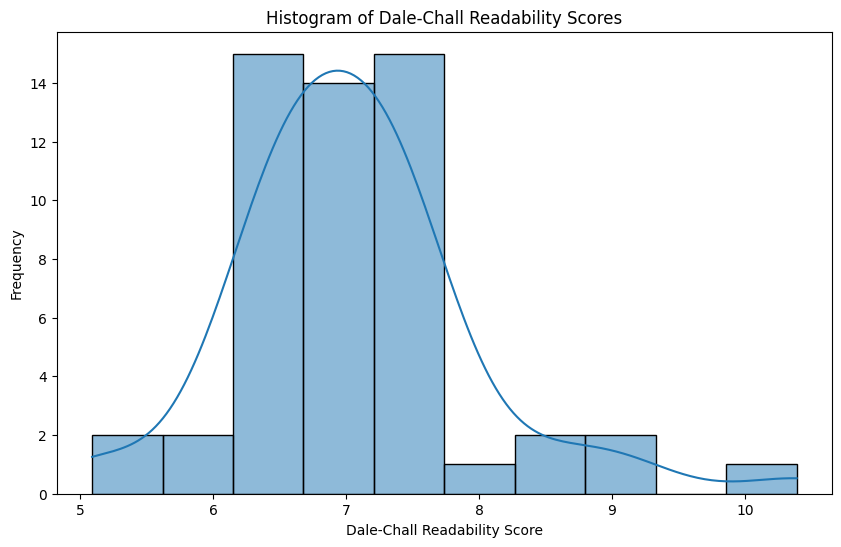

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(conversation_df['Dale_Chall_Readability_Score'], bins=10, kde=True)
plt.title('Histogram of Dale-Chall Readability Scores')
plt.xlabel('Dale-Chall Readability Score')
plt.ylabel('Frequency')
plt.show()

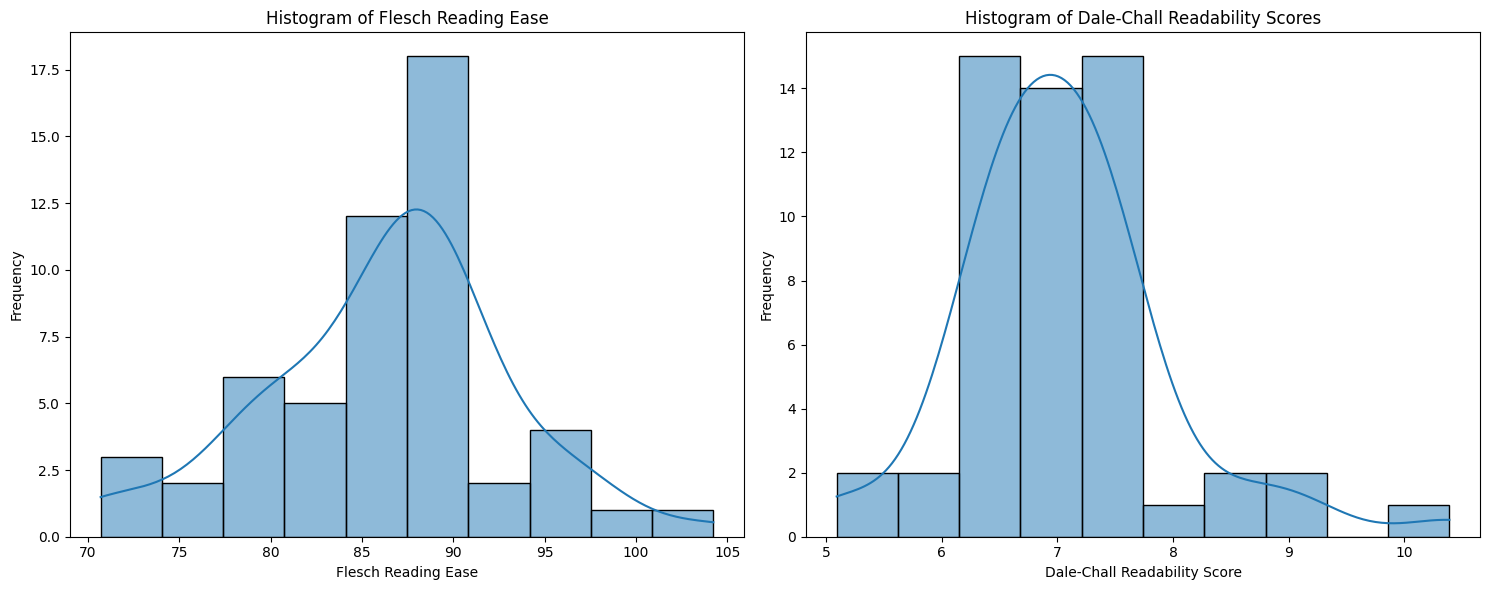

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(conversation_df['Flesch_Reading_Ease'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Flesch Reading Ease')
axes[0].set_xlabel('Flesch Reading Ease')
axes[0].set_ylabel('Frequency')

sns.histplot(conversation_df['Dale_Chall_Readability_Score'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Dale-Chall Readability Scores')
axes[1].set_xlabel('Dale-Chall Readability Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()